# 引導聚集回歸(Baggin Regressor)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import cvxopt
from cvxopt import matrix, solvers
import matplotlib.pyplot as plt
from random import choices

# Training Data

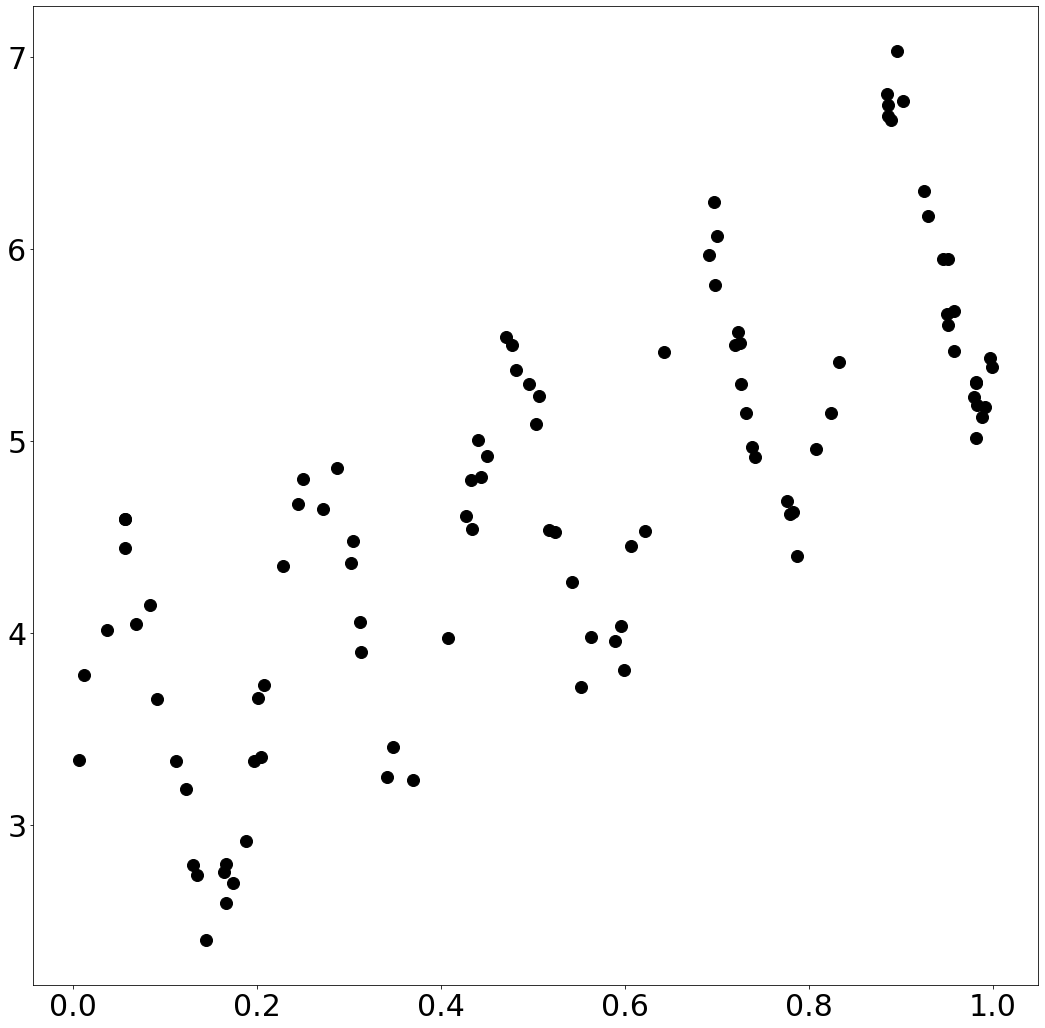

In [2]:
N=100
p2,p1,p0=1,2,3
x=np.zeros(N)
y=np.zeros(N)
# 隨機產生數據點
for i in range(0,len(x)):
    x[i]+=random.random()
    y[i]+=random.random()*0.5
power=[p2,p1,p0]
for i in range(0,len(power)):
    y+=power[len(power)-i-1]*(x**i)
y+=np.sin(x*30)
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(x,y,"ko",markersize=12)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Testing Data

In [3]:
N_test=20
x_test=np.zeros(N_test)
y_test=np.zeros(N_test)
# 隨機產生數據點
for i in range(0,len(x_test)):
    x_test[i]+=random.random()
    y_test[i]+=random.random()*0.5
power=[p2,p1,p0]
for i in range(0,len(power)):
    y_test+=power[len(power)-i-1]*(x_test**i)
y_test+=np.sin(x_test*30)

# Polynomial Kernel

In [4]:
def Polynomial_kernel(x,xx,power,gamma,zeta):
    return (zeta+gamma*np.outer(x,xx))**power

# Kernel Ridge Regression

In [5]:
def KRR(x,y,lambda_2,c,gamma,zeta,N):    
    K=Polynomial_kernel(x,x,c,gamma,zeta)
    a=np.dot(np.linalg.inv(lambda_2*np.diag(np.ones(N))+K),y)
    return a

# Mean Square Error

In [6]:
def MSE(f,y):
    return round(sum((f-y)**2)/len(y),6)

# Bagging

KRR model 1 trainging error: 0.344271 testing error: 0.458312
KRR model 2 trainging error: 0.323755 testing error: 0.4457
KRR model 3 trainging error: 0.318779 testing error: 0.328396
KRR model 4 trainging error: 0.340579 testing error: 0.431753
KRR model 5 trainging error: 0.306011 testing error: 0.393219
KRR model 6 trainging error: 0.833822 testing error: 0.839659
KRR model 7 trainging error: 0.358179 testing error: 0.566041
KRR model 8 trainging error: 0.326013 testing error: 0.358775
KRR model 9 trainging error: 0.348734 testing error: 0.285505
KRR model 10 trainging error: 0.36566 testing error: 0.257812
KRR model 11 trainging error: 0.33188 testing error: 0.532617
KRR model 12 trainging error: 0.323099 testing error: 0.475473
Bagging trainging error: 0.313129 testing error: 0.38739


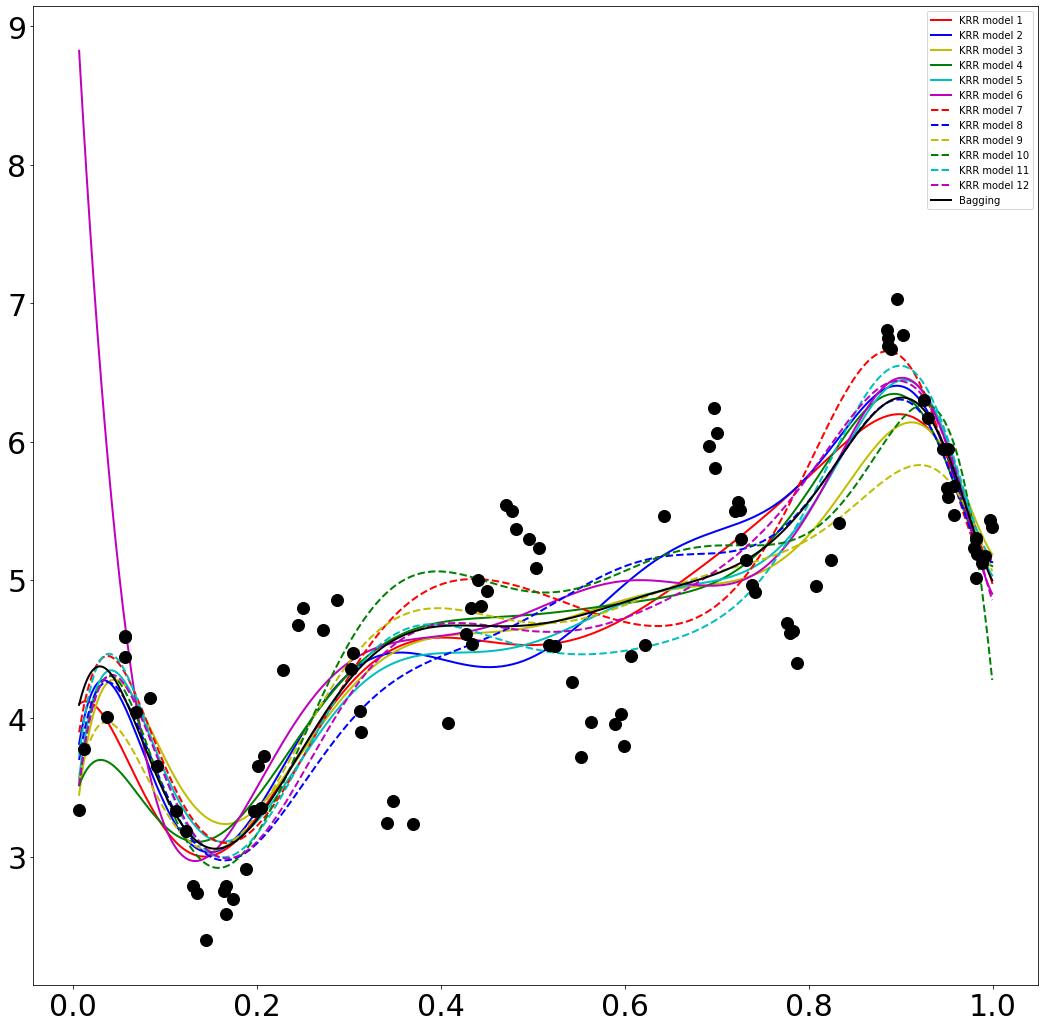

In [7]:
# c: 次方數
# CC: SVM的
# zeta,gamma: Polynomail參數
# T: sub-models數量
c=12
lambda_2=10**-7
zeta,gamma=1,1
T=12
f_MIX=np.zeros(N)
f_test_MIX=np.zeros(N_test)
sol=500
plot_x=np.linspace(min(x),max(x),sol)
plot_y=np.zeros(sol)
line=["r-","b-","y-","g-","c-","m-","r--","b--","y--","g--","c--","m--"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,T):
    regressor="KRR model "+str(i+1)
    # 從0~N隨機取N個數據(可重複)
    seed=choices(range(0,N), k=N)
    a=KRR(x[seed],y[seed],lambda_2,c,gamma,zeta,N)
    f=np.dot(Polynomial_kernel(x,x[seed],c,gamma,zeta),a)
    f_test=np.dot(Polynomial_kernel(x_test,x[seed],c,gamma,zeta),a)
    pred_y=np.dot(Polynomial_kernel(plot_x,x[seed],c,gamma,zeta),a)
    f_MIX+=f
    f_test_MIX+=f_test
    plot_y+=pred_y
    print(regressor,"trainging error:",MSE(f,y),"testing error:",MSE(f_test,y_test))
    plt.plot(plot_x,pred_y,line[i],linewidth=2,label=regressor)
f_MIX/=T
f_test_MIX/=T
plot_y/=T
print("Bagging trainging error:",MSE(f_MIX,y),"testing error:",MSE(f_test_MIX,y_test))
plt.plot(plot_x,plot_y,"k-",linewidth=2,label="Bagging")
plt.plot(x,y,"ko",markersize=12)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend()
plt.show()